In [36]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import gmplot
from PIL import Image

In [2]:
df = pd.read_csv('data.csv')

In [3]:
## A function to plot stacked bar graph
def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)
    
    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

In [4]:
df['booking_created'] = pd.to_datetime(df['booking_created'], format="%m/%d/%Y %H:%M")
df['b_DayOfWeekNum'] = df['booking_created'].dt.dayofweek
df['b_DayOfWeek'] = df['booking_created'].dt.weekday_name
df['b_MonthDayNum'] = df['booking_created'].dt.day
df['b_Month'] = df['booking_created'].dt.month
df['b_HourOfDay'] = df['booking_created'].dt.hour

In [5]:
df['from_date'] = pd.to_datetime(df['from_date'], format="%m/%d/%Y %H:%M")
df['DayOfWeekNum'] = df['from_date'].dt.dayofweek
df['DayOfWeek'] = df['from_date'].dt.weekday_name
df['MonthDayNum'] = df['from_date'].dt.day
df['Month'] = df['from_date'].dt.month
df['HourOfDay'] = df['from_date'].dt.hour

In [6]:
df.head()

id  user_id  vehicle_model_id  package_id  travel_type_id  \
0  132512    22177                28         NaN               2   
1  132513    21413                12         NaN               2   
2  132514    22178                12         NaN               2   
3  132515    13034                12         NaN               2   
4  132517    22180                12         NaN               2   

   from_area_id  to_area_id  from_city_id  to_city_id           from_date  \
0          83.0       448.0           NaN         NaN 2013-01-01 02:00:00   
1        1010.0       540.0           NaN         NaN 2013-01-01 09:00:00   
2        1301.0      1034.0           NaN         NaN 2013-01-01 03:30:00   
3         768.0       398.0           NaN         NaN 2013-01-01 05:45:00   
4        1365.0       849.0           NaN         NaN 2013-01-01 09:00:00   

     ...     b_DayOfWeekNum  b_DayOfWeek  b_MonthDayNum b_Month  b_HourOfDay  \
0    ...                  1      Tuesday              1       1            1   
1    ...                  1      Tuesday              1       1            2   
2    ...                  1      Tuesday              1       1            3   
3    ...                  1      Tuesday              1       1            4   
4    ...                  1      Tuesday              1       1            7   

   DayOfWeekNum  DayOfWeek  MonthDayNum  Month  HourOfDay  
0             1    Tuesday            1      1          2  
1             1    Tuesday            1      1          9  
2             1    Tuesday            1      1          3  
3             1    Tuesday            1      1          5  
4             1    Tuesday            1      1          9  

[5 rows x 29 columns]

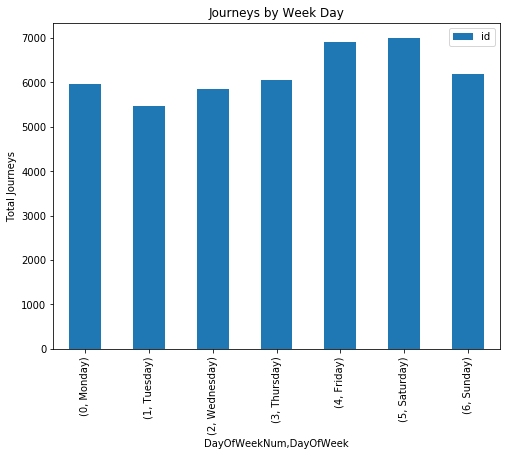

In [7]:
a_day = df.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='id',
                                  aggfunc='count')
a_day.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');

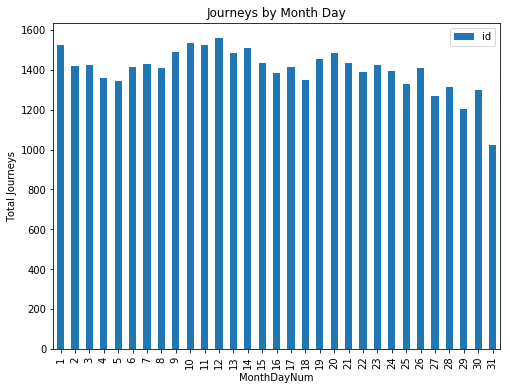

In [8]:
a_month = df.pivot_table(index=['MonthDayNum'],
                                  values='id',
                                  aggfunc='count')
a_month.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

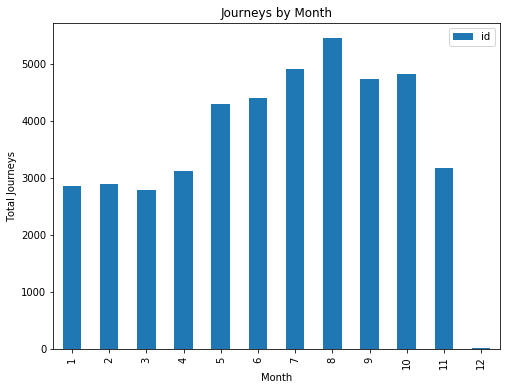

In [9]:
a_month = df.pivot_table(index=['Month'],
                                  values='id',
                                  aggfunc='count')
a_month.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month');

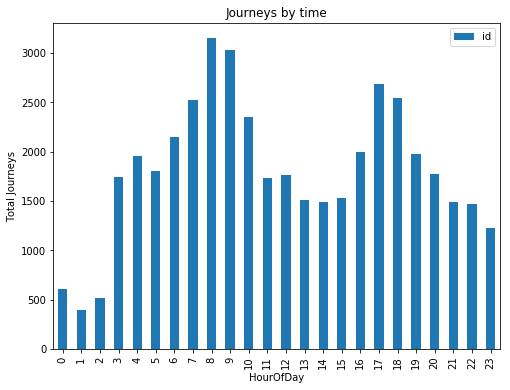

In [10]:
a_time = df.pivot_table(index=['HourOfDay'],
                                  values='id',
                                  aggfunc='count')
a_time.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by time');

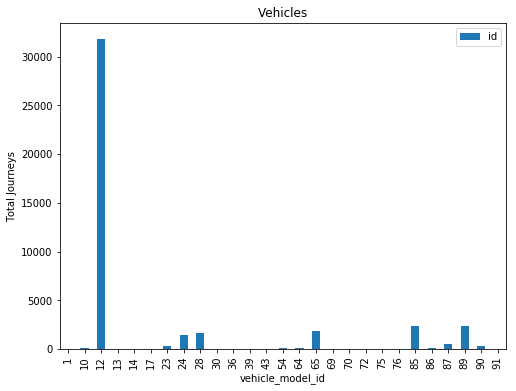

In [11]:
a_time = df.pivot_table(index=['vehicle_model_id'],
                                  values='id',
                                  aggfunc='count')
a_time.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Vehicles');

In [12]:
# plot travel type id vs month and day of month
df_travel = pd.get_dummies(df['package_id'])
df_travel['long']=0
df_travel.loc[df['travel_type_id']==1, 'long']=1
df_travel['p2p']=0
df_travel.loc[df['travel_type_id']==2, 'p2p']=1
df_travel['month']=df['Month']
df_travel['day']=df['MonthDayNum']
df_travel.head()

1.0  2.0  3.0  4.0  5.0  6.0  7.0  long  p2p  month  day
0    0    0    0    0    0    0    0     0    1      1    1
1    0    0    0    0    0    0    0     0    1      1    1
2    0    0    0    0    0    0    0     0    1      1    1
3    0    0    0    0    0    0    0     0    1      1    1
4    0    0    0    0    0    0    0     0    1      1    1

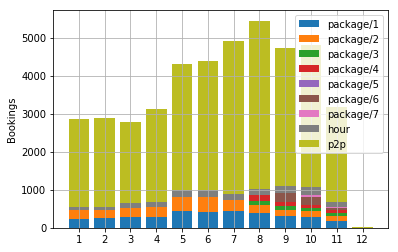

In [13]:
series_labels = [i for i in range(1,13)]
df_travel_mon = df_travel.groupby('month').sum()
df_travel_day = df_travel.groupby('day').sum()
data = np.array(df_travel_mon)[:, :-1].T

category_labels = ['package/1','package/2','package/3','package/4','package/5', 'package/6', 'package/7', 'hour', 'p2p']

stacked_bar(
    data,
    category_labels,
    series_labels,
    show_values=False,
    value_format="{:.1f}",
    y_label="Bookings"
)
plt.show()


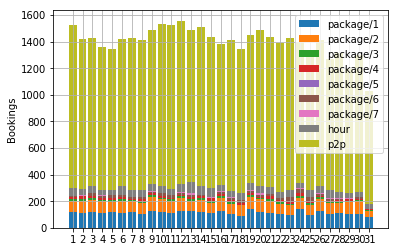

In [14]:
series_labels_2 = [i for i in range(1,32)]
data = np.array(df_travel_day)[:, :-1].T
stacked_bar(
    data,
    category_labels,
    series_labels_2,
    show_values=False,
    value_format="{:.1f}",
    y_label="Bookings"
)
plt.show()

In [15]:
df2 = df
df2['no_medium/offline'] = 1
df2.loc[df2['online_booking']==1, 'no_medium/offline'] = 0
df2.loc[df2['mobile_site_booking']==1, 'no_medium/offline'] = 0
df2[['online_booking', 'mobile_site_booking','no_medium/offline']].head()

online_booking  mobile_site_booking  no_medium/offline
0               0                    0                  1
1               0                    0                  1
2               0                    0                  1
3               0                    0                  1
4               0                    0                  1

In [16]:
df_month = df[['online_booking', 'mobile_site_booking', 'no_medium/offline', 'Month']].groupby('Month').sum()
df_day_of_month = df[['online_booking', 'mobile_site_booking', 'no_medium/offline', 'MonthDayNum']].groupby('MonthDayNum').sum()


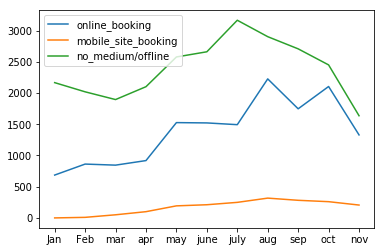

In [17]:
series_labels = ['online_booking', 'mobile_site_booking', 'no_medium/offline']

data = np.array(df_month[['online_booking', 'mobile_site_booking', 'no_medium/offline']]).T

category_labels =['Jan', 'Feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']

fig, ax = plt.subplots()
ax.plot(category_labels[:-1], data[0,:-1], label=series_labels[0])
ax.plot(category_labels[:-1], data[1,:-1], label=series_labels[1])
ax.plot(category_labels[:-1], data[2,:-1], label=series_labels[2])
ax.legend()

plt.show()

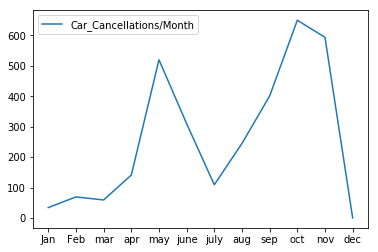

In [18]:
category_labels_2 =['Jan', 'Feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']
d = df[['Car_Cancellation', 'Month']].groupby('Month').sum()
fig, ax = plt.subplots()
ax.plot(category_labels_2, d)
ax.legend(['Car_Cancellations/Month'])
plt.show()

In [35]:
##Plotting starting points via gmplot
lngs = [float(q) for q in df['from_long']]
lats = [float(q) for q in df['from_lat']]

lngs2 = [float(q) for q in df['to_long']]
lats2 = [float(q) for q in df['to_lat']]

fig = plt.figure(figsize=(8, 8))

gmap2 = gmplot.GoogleMapPlotter(12.9176, 
                                77.5946, 13) 
gmap2.scatter( lats, lngs, '#ff0000', 
                              size = 80, marker = False )


gmap2.draw( "D:\\task\\map12.html" )

<Figure size 576x576 with 0 Axes>

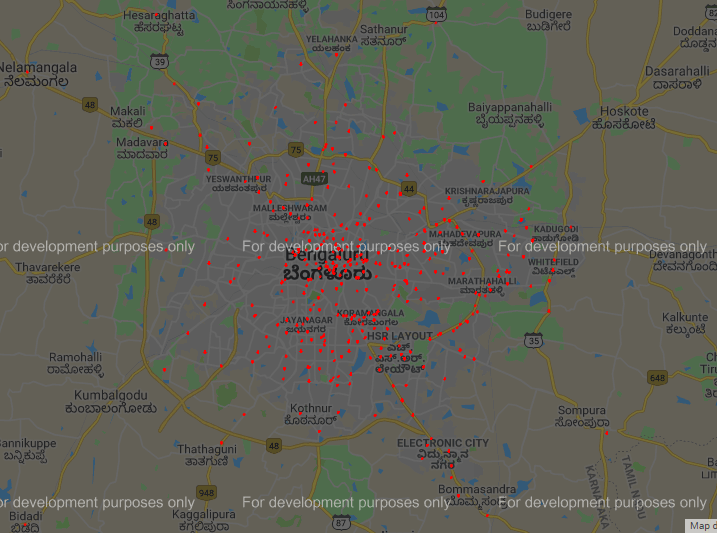

In [37]:
Image.open('map.png')